# Quiz 2 (part 2): 

### Deadline: Wednesday 29 May 2024 (by 19h00)
### Credits: 10 points

## Name: Males Araujo Yorlan

## 6. (4 points) Stratified atmosphere

The Earth's atmosphere cools down with altitude. To model this we can assume that the air is adiabatic with an equation of state given by:

$p^{1-\gamma}\,T^{\gamma} = \rm constant$,

where $p$ is the thermal pressure, $T$ is the temperature, and $\gamma=1.4$ is the polytropic index. The above equation results in the following differential equation:

$\frac{dp}{p}=\frac{\gamma}{\gamma - 1}\frac{dT}{T}$

In addition, the equation of hydrostatic equilibrium states that:

$\frac{dp}{p}=-\frac{\mu_m\,g}{R\,T}\,dz$, 

where $\mu_m=28.97\,\rm g\,mol^{-1}$ is the molecular weight of the gas, $g$ is the acceleration due to gravity, $R$ is the ideal gas constant, and $z$ is height above ground level.

Combining the two equations above, we obtain:

$\frac{dT}{dz}=-\frac{\gamma -1}{\gamma}\frac{\mu_m\,g}{R}$,

whose solution reads:

$T=T_0\left(1-\frac{\gamma-1}{\gamma}\frac{z}{z_0}\right)$, 

where $T_0$ is the temperature at ground level, and 

$z_0=\frac{R\,T_0}{\mu_m\,g}$

is the isothermal scale-height calculated using this temperature. 

### (a) Create a Python function that receives $T_0=25\,\rm ^{\circ}C$ and $z$ as inputs, and returns:

- the value of $z_0$ in $\rm km$


- the function $T(z)$ with $T$ in $\rm ^{\circ}C$

First of all, let us carry out dimensional analysis to be sure. On $z_0$:
$$ z_0 = \frac{R\,T_0}{\mu_m \, g} = \frac{[\rm M\,L^2\,T^{-2}\,mol^{-1}\,\mathcal{T}^{-1}][\rm \mathcal{T}]}{[\rm M\,mol^{-1}][\rm L\,T^{-2}]} = [\rm L]$$

where $\mathcal{T}$ denotes temperature units. The units of $T(z)=T_0\left(1-\frac{\gamma-1}{\gamma}\frac{z}{z_0}\right)$ will be solely determined by $T_0$ because what's inside the parentheses is dimensionless.

In [1]:
# Importing the libraries:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# We globally define the constants:
mu = 28.97/1000 # kg mol^{-1}
r = 8.31 # J mol^{-1} K^{-1}, J = kg m^2 s^{-2}
g = 9.8 # m s^{-2}
gamma = 1.4 

In [3]:
# Function:
def conversions(temp_val_c, z_val):
    """
    Computes the function T(z) and the value z_0 needed
    to get said function.
    Inputs: temp_val_c -> temperature value in celsius
            z_val -> value or array of values that will be the inputs
                     of the function.
    Outputs: z_kilometers -> constant within T(z) in km
             t_celsius -> function T(z) in celsius
    Author: MAY
    """
    # We need the temperature in K for z_0, then:
    temp_val_k = temp_val_c + 273.15

    # Compute z_0 in kilometers:
    z_meters = (r*temp_val_k)/(mu*g)
    z_kilometers = abs(z_meters/1000) #abs() is used because distances can't be negative

    # Now T(z):
    fraction = ((gamma-1)*(z_val))/(gamma*z_kilometers)
    t_celsius = temp_val_c*(1-fraction)
    
    return z_kilometers, t_celsius

### (b) Code a Python function that returns a pcolor map of $T(z)$ (i.e. of the stratified atmosphere) interpolated on an ($x \times z$) = ($20\,\rm km\times 20\,\rm km$) grid with $z$ on the vertical axis. Consider that the temperature does not vary across $x$, only with height, $z$.

In [12]:
# Function:
def pcolor_map(t_0, z_array, boolean):
    """
    Makes a pcolor map of T(z) interpolated on a (20km x 20km) grid.
    It uses the above function conversions().
    Inputs: t_0 -> initial temperature in celsius
            z_array -> inputs of the function T(z)
            boolean -> True or False to show the plot or not
    Outputs: matrix -> T(x,z) which is constant in x
    Author: MAY
    """
    # Calling our latest function
    z_km, t_z_array = conversions(t_0, z_array)

    # Create the grid (20km x 20km):
    x = np.linspace(0, 20, len(z_array))
    y = np.linspace(0, 20, len(z_array))
    
    x_2d, y_2d = np.meshgrid(x, y)

    # Since t_z_array is 1D, we create a constant vector
    # with the same shape to form a matrix nxn:

    # Constant vector:
    x_1d = np.reshape(np.full(len(z_array),0),(1,len(z_array)))
    
    # Reshape t_z_array:
    t_z_reshaped = np.reshape(t_z_array,(len(z_array),1))

    # Image:
    matrix = t_z_reshaped + x_1d

    # Pcolor map:
    if boolean:
        plt.figure()
        Z1 = plt.pcolor(x_2d, y_2d, matrix, cmap= "inferno")
        CB1 = plt.colorbar(Z1, label = r"$Temperature \,[°C]$")
        plt.xlabel(r"$x-axis\,[km]$")
        plt.ylabel(r"$z-axis\,[km]$")
        plt.title(r"$Stratified\, atmosphere$")
        plt.show()
        plt.close()

    return matrix

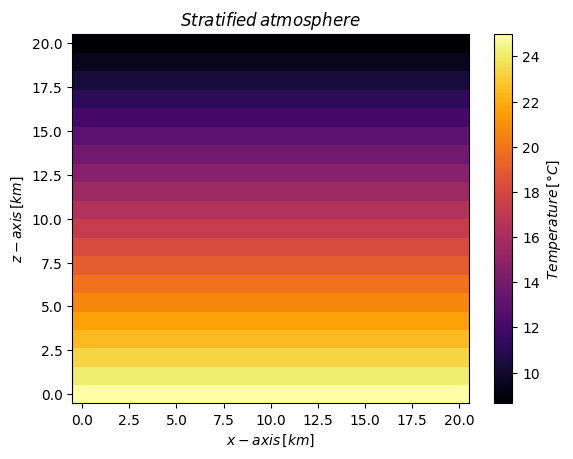

In [13]:
# T(z):
t_0 = 25
z_array = np.linspace(0,20,20)
image_matrix = pcolor_map(t_0, z_array, True)

It is observed that this model does describe how the temperature of the atmosphere changes wilt altitude: it cools down as the altitude gets higher. However, assuming the code and units are good, it does not seem to match the expected temperature at $20\,\rm km$, which should be, according to Wikipedia, around $-50\,\rm ^{\circ}C$. It may be because the model is simple.

### (c) Code a Python function that returns a quiver map showing the direction of the buoyancy forces in the atmosphere. Remember that $p\propto T^{\frac{\gamma}{\gamma -1}}$.

Since $\gamma=1.4$, $p\propto T^{7/2}$ and so pressure is directly propotional to temperature. Additionally, the gradient of such quantitites should have the same direction. Then, from the well known equation
$$ -\nabla V =\mathbf{F},$$
the direction of the buoyancy forces would have to be *opposite* to the gradient of temperature since it has the same direction as that of the pressure.

So, to determine the direction of the buoyancy forces, we use the gradient of the data with $T_0\rightarrow T_0^{7/2}$.

In [14]:
# Function:
def quiver_map(t_0, z_values):
    """
    Makes a quiver map of the direction of the bouyancy
    forces in the atmosphere. It uses the function p_colomap().
    Inputs: t_zero -> initial temperature in celsius
            z_values -> input array of T(z)
    Outputs: grad_x -> gradient along x
             grad_z -> gradient along z
             x_1 -> x component of the grid
             z_1 -> z component of the grid
             x_1_2d -> x component of the mesh
             z_1_2d -> z component of the mesh
    Author: MAY
    """
    # We get T_0^{7/2} with a previous function:
    _, t_celsius = conversions(t_0, z_values)
    t_7_2 = t_celsius**(7/2)
    
    # We start by calling the function to obtain the matrix:
    image = pcolor_map(t_7_2, z_values, False)

    # We get the correspoding dx
    dx = float(image[0][0]-image[1][0])

    # Calculate the gradient:
    grad = np.gradient(image, dx)

    # Get components along x and z:
    grad_x = grad[1]
    grad_z = grad[0]
    
    # Compute the modulus:
    mod_grad = np.sqrt(grad_x**2 + grad_z**2)

    # Create the grid (20km x 20km):
    x_1 = np.linspace(0, 20, len(z_values))
    z_1 = np.linspace(0, 20, len(z_values))
    
    x_1_2d, z_1_2d = np.meshgrid(x_1, z_1)
    
    # Plotting the quiver map:
    
    plt.figure(figsize=(6.55,5))
    Z1 = plt.quiver(x_1_2d, z_1_2d, -grad_x, -grad_z, mod_grad, cmap = 'Blues')
    CB1 = plt.colorbar(Z1, format='%.2f', label = "Magnitude [Force]")
    plt.xlabel(r"$x-axis\,[km]$")
    plt.ylabel(r"$z-axis\,[km]$")
    plt.title(r"$Bouyancy\,force\,field$") 
    plt.xlim(x_1[0],x_1[-1])
    plt.ylim(z_1[0],z_1[-1])
    plt.show()
    plt.close()

    return grad_x, grad_z, x_1, z_1, x_1_2d, z_1_2d # To be used in the following problem

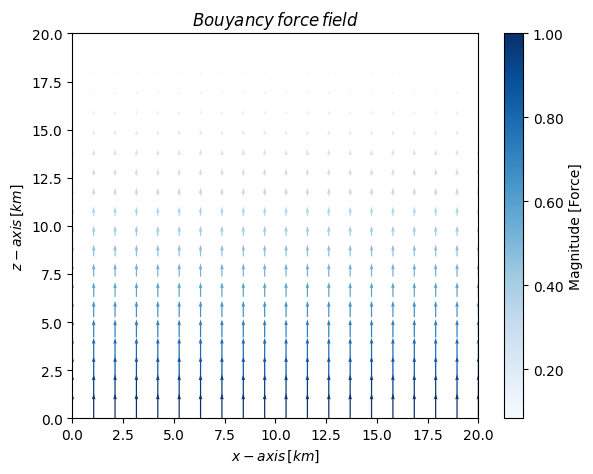

In [15]:
# Calling the function:
gradient_x, gradient_z, x, z, x_2d, z_2d = quiver_map(t_0, z_array)

The direction of the bouyancy force field points upwards (which was to expect), and the force is stronger at low altitudes, while at highs it becomes null.

### (d) Create a Python function that adds a (small-amplitude) stochastic force field to the one calculated above, and returns a quiver map showing the direction of the resulting buoyancy plus stochastic forces in the atmosphere. What does this stochastic force field represent?

The stochastic force field represents, in general, a perturbation, which may be caused by various reasons. For instance, it can be caused by turbulence in the atmosphere due to chaotic motion of air and weather conditions (rain, wind, etc). However, if the amplitudes of such perturbations are small (as it is the case here), we found that the tendency remains the same: most of the the bouyancy force field still points upwards.

The small amplitude, $0.3$, was chosen in accordance with the magnitude of the buoyancy force field.

In [22]:
# Function:
def stochastic(g_x, g_z, x1d, z1d, x2d, z2d):
    """
    Adds a small-amplitude stochastic force field to the buoyancy force
    field, and returns the quiver map of the perturbed force field.
    Inputs: g_x -> gradient along x
            g_z -> gradient along z
            x1d -> x component of the grid
            z1d -> z component of the grid
            x2d -> x component of the mesh
            z2d -> z component of the mesh
    Outputs: The function (plot) itself.
    Author: MAY
    """
    # We generate 2 sets of random data (negative and positive values):
    np.random.seed(212)
    pert_x = 0.15*np.random.uniform(-1, 1, (len(z_array), len(z_array)))
    np.random.seed(232)
    pert_z = 0.15*np.random.uniform(-1, 1, (len(z_array), len(z_array)))

    # Now, we use them to perturb the buoyancy force field:
    # The components:
    stoc_x = pert_x - g_x
    stoc_z = pert_z - g_z

    # The modulus:
    mod_stoc = np.sqrt(stoc_x**2+stoc_z**2)

    # And plot:
    plt.figure(figsize=(6.55,5))
    Z1 = plt.quiver(x_2d, z_2d, stoc_x, stoc_z, mod_stoc, cmap = 'Blues')
    CB1 = plt.colorbar(Z1, format='%.2f', label = "Magnitude [Force]")
    plt.xlabel(r"$x-axis\,[km]$")
    plt.ylabel(r"$z-axis\,[km]$")
    plt.title(r"$Perturbed\,bouyancy\,force\,field$") 
    plt.xlim(x1d[0],x1d[-1])
    plt.ylim(z1d[0],z1d[-1])
    plt.show()
    plt.close()

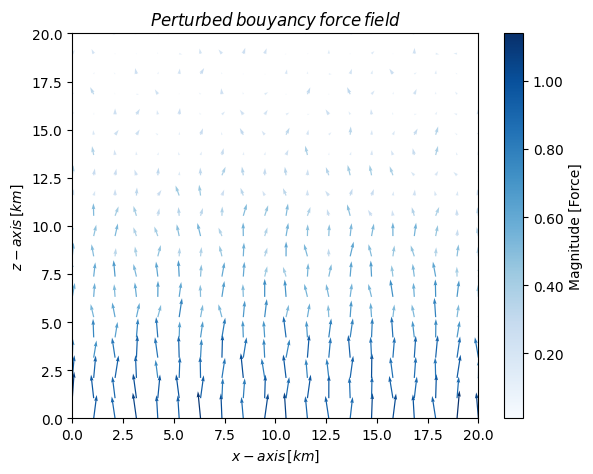

In [23]:
# We call the function:
stochastic(gradient_x, gradient_z, x, z, x_2d, z_2d)

As stated above, in general, the field still points upwards where the magnitude of the force is considerable, but becomes more random as the altitude increases.

## 7. (6 points) Understanding the Solar cycle

This problem consists of analysing the underlying periodity of the observed sunspots on the Sun (see some images here: https://en.wikipedia.org/wiki/Sunspot). The data file provided below contains the observed number of sunspots on the Sun for each month since January 1749 (month 0). The file contains two columns of numbers, the first representing the month and the second being the sunspot number.


#### Download data file:
https://github.com/wbandabarragan/computational-physics-1/blob/main/sample-data/sunspots.txt


### Sunspot count:

#### (a) Write a python function that reads the data in the file and returns two arrays:
- time
- sunspot count number

In [24]:
# Importing libraries
import pandas as pd

In [25]:
# Function
def arrays(filename):
    """
    Reads a file containing two columns and returns each in arrays.
    Input: filename -> variable storing the file
    Output: time_months -> array of the first column
            number_sunspots -> array of the second column
    Author: MAY
    """
    # Getting the file into a pandas dataframe
    df = pd.read_csv(filename, delimiter = "\s+", header = None)

    # And the corresponding arrays
    time_months = df[0] 
    number_sunspots = df[1]

    return time_months, number_sunspots

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_75745/1867047785.py:11: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(filename, delimiter = "\s+", header = None)


#### (b) Call your function above and make a labeled plot of number of sunspots as a function of time. 

In [26]:
# Getting the arrays
file = "./data/sunspots.txt"
time_array, sunspots = arrays(file)

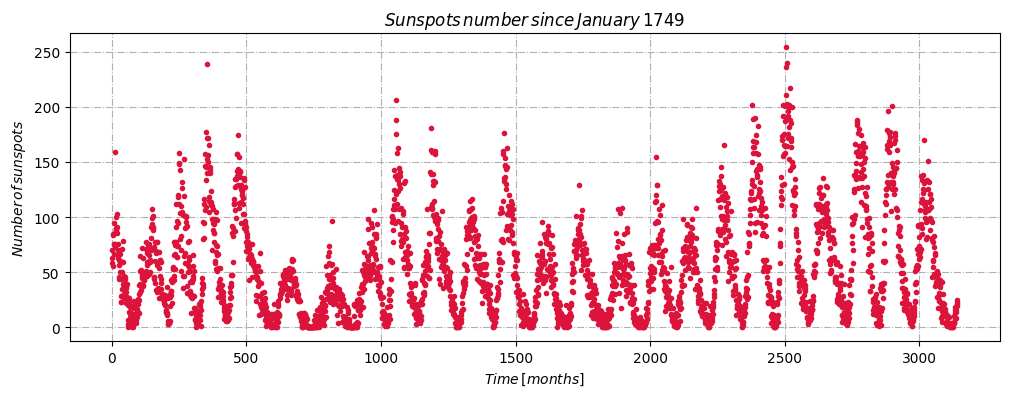

In [30]:
# Plotting:
plt.figure(figsize=(12,4))
plt.plot(time_array, sunspots, linestyle = " ", marker = ".", color = "crimson")
plt.grid(linestyle = "-.")
plt.title(r"$Sunspots\, number\,since\,January\,1749$")
plt.xlabel(r"$Time\,[months]$")
plt.ylabel(r"$Number\,of\,sunspots$")
plt.show()
plt.close()

#### (c) Briefly comment, what features do you see in the data? What physical mechanism do you think causes this behaviour?

The main features are that the data oscillates without maintaining the same amplitude, but it does seem to keep a similar frequency based on the time separation between the lows or the peaks. 

The periodicity might be due to the rotation of the sun, implying that the sunspots are not evenly located in the surface of the sun, but perhaps only in a specific zone (face) of it.

### Solar cycle - analysis 1:

#### (d) Here you will estimate the length of the Solar cycle in months in a very rough way. Write a function that finds the peaks of sunspot count and returns two arrays (jointly with a CSV file) for the:

- month where a peak was found
- respective sunspot count

In [28]:
# Libraries
import scipy.signal as ss

In [31]:
# Function:
def peaks(h, d, sunspots_array, t_array):
    """
    Finds the peaks of the sunspot count and returns two arrays along
    with a csv file.
    Inputs: h -> minimal height required for peaks
            d -> minimal distance between peaks
            sunspots_array -> the array containing the sunspout count
            t_array -> the array with the months
    Outputs: sunspot_number -> the peaks sunspot count array
             temporal_array -> the array with the months where a peak was found
             csv -> the csv file with the two arrays
    Author: MAY
    """
    # We use the following function:
    peaks_indices, _ = ss.find_peaks(sunspots_array, height = h, distance = d)

    # Use the arrays:
    sunspots_number = sunspots_array[peaks_indices]
    temporal_array = t_array[peaks_indices]

    # Create the csv file:
    peak_sunspots = pd.DataFrame({"Time [months]": temporal_array, "Sunspots number": sunspots_number})
    peak_sunspots.to_csv("peaks_sunspots.csv", sep="," , index=False)

    csv = pd.read_csv("peaks_sunspots.csv")

    return sunspots_number, temporal_array, csv

#### (e) Call your function and report the peaks on the plot of sunspot count versus time.

In [32]:
# Assigning the height and distance to use 
h = 50
d = 90

# Calling the function:
sunspots_peak, t_peak, csvfile = peaks(h, d, sunspots, time_array)
#print(t_peak.shape, sunspots_peak.shape)

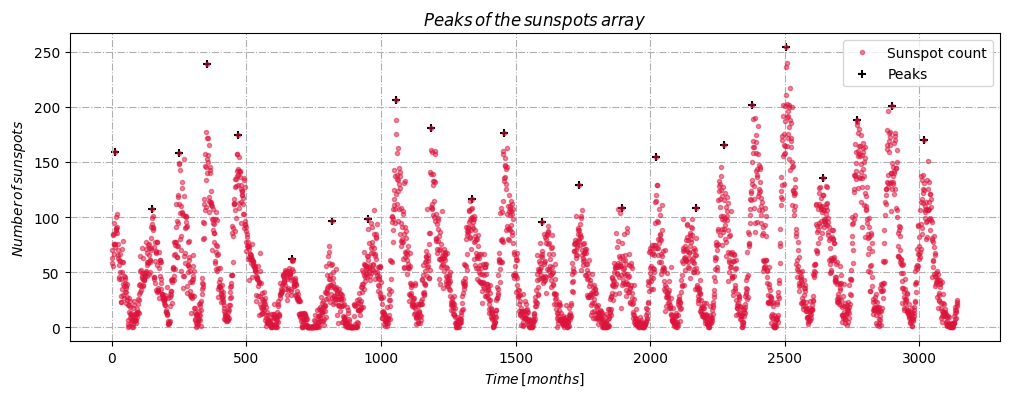

In [34]:
# Plotting:
plt.figure(figsize=(12,4))
plt.plot(time_array, sunspots, linestyle = " ", marker = ".", color = "crimson",\
         alpha=0.5, label = "Sunspot count")
plt.scatter(t_peak, sunspots_peak, marker = "+", color = "k", label = "Peaks")


plt.title(r"$Peaks\,of\,the\,sunspots\,array$")
plt.xlabel(r"$Time\,[months]$")
plt.ylabel(r"$Number\,of\,sunspots$")
plt.legend()

plt.grid(linestyle = "-.")
plt.show()
plt.close()

#### (f) Write a function that calculates the average of the distance between consecutive peaks. Such average will be the first estimate for the length of the Solar cycle. Call your funtion and print the value.

In [35]:
# Function:
def average(time_peaks_array):
    """
    Calculates the average of the distance between consecutive peaks.
    Input: time_peaks_array -> array with the months of the peaks
    Output: mean -> mean of the differences in in the input
    Author: MAY
    """
    # Getting the differences between consecutive points:
    differences = abs(np.diff(time_peaks_array))

    # And calculating the mean:
    mean = np.mean(differences)

    return mean

In [36]:
# Calling the function
average_val = average(t_peak) # in months
print(f"The first estimate in years of the solar cycle period is of {round(average_val/12, 3)} years.")

The first estimate in years of the solar cycle period is of 10.899 years.


Considering the solar cycle is about 11 years, the result obtained is not bad.

### Solar cycle - analysis 2:

#### (g) Now we will use a more professional approach, which relies on Fourier analysis. Write a function that computes the Fourier transform of the sunspot data and returns the Fourier power and the respective frequencies.


In [37]:
# Function:
def fourier(sunspots_array, t_array):
    """
    Compues the FFT of the sunspot data and returns the Fourier power
    with the respective frequencies. 
    Inputs: sunspots_array -> original sunspot signal
           t_array -> original time array
    Outputs: fourier_power -> FFT of the signal
             freq -> frequencies
             n -> lenght of one of the arrays
    Author: MAY
    """
    # Fourier power:
    fourier_power = np.fft.fft(sunspots_array)

    # Frequencies:
    n = len(t_array)
    spacing = t_array[1] - t_array[0]
    
    freq = np.fft.fftfreq(n, spacing)

    return fourier_power, freq, n

#### (h) Call your function and make a plot of the 1D Fourier power spectrum of the sunspot signal. Are there peaks at nonzero frequency values? What do they represent? 

In [38]:
# Calling the function:
f_power, fr, n = fourier(sunspots, time_array)

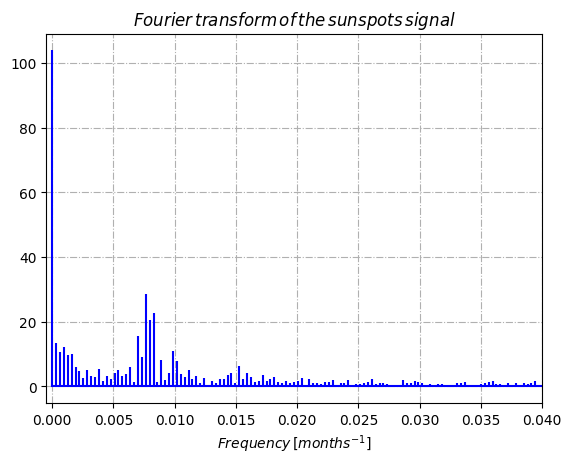

In [48]:
# Plot:
plt.figure()
plt.stem(fr[:n//2], abs(f_power)[:n//2]/(n//2),\
        'b', markerfmt=" ", basefmt="-b")

plt.title(r"$Fourier\,transform\,of\,the\,sunspots\,signal$")
plt.xlabel(r"$Frequency\,[months^{-1}]$")

plt.xlim(-0.0005,0.04)
plt.grid(linestyle = "-.")
plt.show()

There are peaks at nonzero frequency values and they represent *noise* in the signal.

#### (i) Find the frequency of the highest nonzero peak. Using this frequency, calculate and print the Solar cycle period and compare it to the one obtained in (f).

To find it, we will exclude the first element in the Fourier power array (since it is at 0 frequency) and find the index of the highest peak in that new array. After that, we'll compute the Solar cycle period using the corresponding frequency.

In [40]:
# Excluding first element
except_0 = abs(f_power)[1:]/(n//2)

# Finding the index of the peak:
peak, _ = ss.find_peaks(except_0, height = 25)
# print(peak)

# And the corresponding frequency element
freq_elem = fr[peak[0]+1] # +1 because we didn't exclude the first element here

The function returned two different indexes with exactly the same height. I assume that was because we're using the absolute value of the array.

In [41]:
# Print
print(f"The second estimate in years of the solar cycle period is of {round((1/freq_elem)/12,3)} years.")

The second estimate in years of the solar cycle period is of 10.913 years.


The estimate is better than the one obtained by "brute force", but, more important, the method is more reliable and easily reproducible for other kind of problems.

### Fourier filtering:

#### (j) Write a function that filters outs all frequencies lower and higher than the frequency of the peak and returns the inverse Fourier transformed signal.

In [44]:
# Function:
def cleaner(peak_val, frequency_array, fourier_array):
    """
    ilters outs all frequencies lower and higher
    than the frequency of the peak and returns the 
    inverse Fourier transformed signal.
    Inputs: peak_val -> frequency of the peak found earlier
            frequency_array -> array with the frequencies
            fourier_array -> FFT of the signal
    Outputs: inverse_ft -> inverse FFT of the signal
             amplitude_array -> cleaned FFT of the signal
    Author: MAY
    """
    # Calculating the cutoffs:
    cutoff_0 = peak_val - round(frequency_array[peak[0]+2]-frequency_array[peak[0]+1], 4)  #months^{-1}
    cutoff_1 = peak_val + round(frequency_array[peak[0]+2]-frequency_array[peak[0]+1], 4)  #months^{-1}

    # Copy
    fourier_copy = fourier_array.copy()
    
    # Clean the array:
    fourier_copy[np.abs(frequency_array) < cutoff_0] = 0
    fourier_copy[np.abs(frequency_array) > cutoff_1] = 0

    # Getting the amplitudes to do a plot:
    amplitude_array = np.abs(fourier_copy)/(len(frequency_array)//2)

    # Computing the IFT:
    inverse_ft = np.fft.ifft(fourier_copy)

    return inverse_ft, amplitude_array

#### (k) Call your funtion and make a plot. Compare it to the original signal. What kind of signal do you get and why?

In [45]:
# Call the function:
inv_ft, amplitudes = cleaner(freq_elem, fr, f_power)

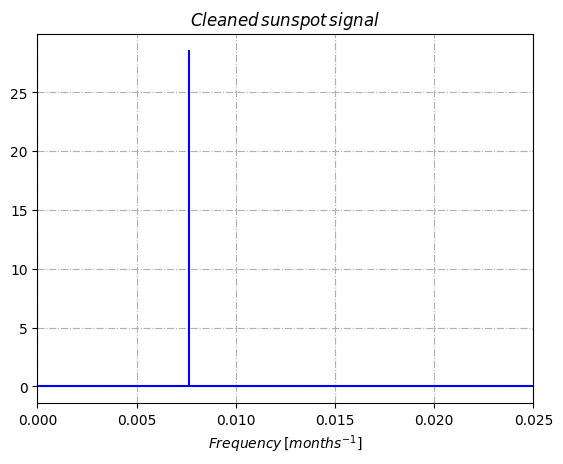

In [49]:
# We present the cleaned function:
plt.figure()

plt.stem(fr, amplitudes, 'b', markerfmt=" ", basefmt="-b")

plt.title(r"$Cleaned\, sunspot\, signal$")
plt.xlabel(r"$Frequency\,[months^{-1}]$")

plt.grid(linestyle = "-.")
plt.xlim(0,0.025)
plt.show()
plt.close()

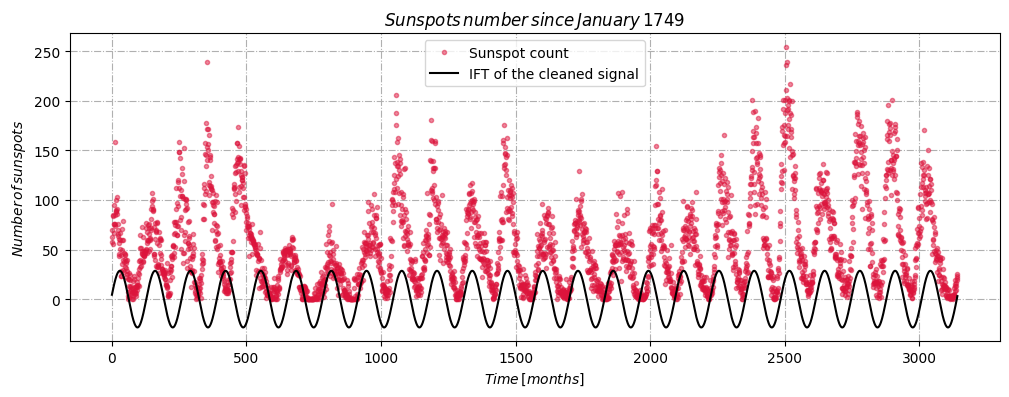

In [50]:
# And its IFT along with the original data:
plt.figure(figsize =(12,4))

plt.plot(time_array, sunspots, linestyle = " ", marker = ".", color = "crimson",\
         alpha=0.5, label = "Sunspot count")
plt.plot(time_array, inv_ft.real, color = "k", label = "IFT of the cleaned signal")

plt.title(r"$Sunspots\, number\,since\,January\,1749$")
plt.xlabel(r"$Time\,[months]$")
plt.ylabel(r"$Number\,of\,sunspots$")

#plt.xlim(0,200)
#plt.ylim(-100,100)
plt.grid(linestyle = "-.")
plt.legend()
plt.show()
plt.close()

The kind of signal we obtained is a sinusoidal wave because the cleaned signal in the Fourier space contained one frequency only. The fact it does not seem to fully match the original data might be attributed to noise present in the original signal.